In [1]:
#Loads
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engagement = pd.read_csv('takehome_user_engagement.csv', encoding = "ISO-8859-1")

In [5]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

In [8]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [9]:
engagement = engagement.sort_values(['user_id', 'time_stamp']).drop_duplicates()

In [10]:
engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [11]:
temp=[['2013-01-01 10:05:23','1'],['2013-01-03 16:35:23','1'], ['2013-01-06 11:06:35','1'], ['2013-01-10 12:05:43','1'], ['2013-01-11 13:32:12','2'], ['2013-01-04 16:26:34','3'], ['2013-01-05 14:02:51','3'], ['2013-01-11 18:35:53','3'], ['2013-01-04 12:26:34','4'], ['2013-01-05 13:31:11','4'], ['2013-01-12 17:35:52','4']]

In [12]:
temp = pd.DataFrame(temp)

In [13]:
temp = temp.rename(columns={0: "time_stamp", 1: "user_id"})

In [14]:
temp['time_stamp'] = pd.to_datetime(temp['time_stamp'])
temp['time_stamp'] = temp['time_stamp'].dt.floor('d').astype(np.int64)
a = temp.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
print (b)

user_id    
1        0     NaN
         1     NaN
         2     5.0
         3     7.0
2        4     NaN
3        5     NaN
         6     NaN
         7     7.0
4        8     NaN
         9     NaN
         10    8.0
Name: time_stamp, dtype: float64


In [15]:
engagement['time_stamp'] = engagement['time_stamp'].dt.floor('d').astype(np.int64)

In [16]:
a = engagement.groupby('user_id')['time_stamp'].rolling(window=3)

In [17]:
b = pd.to_timedelta((a.max()- a.min())).dt.days
print (b)

user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3         24.0
         4         26.0
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: time_stamp, Length: 207917, dtype: float64


In [18]:
c = set(b[b <= 7].index.get_level_values('user_id').tolist())
users['adopted'] = users['object_id'].apply(lambda x : 1 if x in c else 0)

In [19]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0


## Exploratory Data Analysis

<AxesSubplot:xlabel='adopted', ylabel='count'>

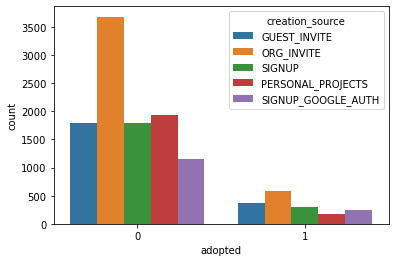

In [20]:
sns.countplot(x='adopted', data=users, hue='creation_source')

Most of the users join the platform through invitations from an organization as a full member. The percentage for this creation source is both highest among people who are adopted and not adopted. 

In [21]:
guest_adoptedrate = ((users['adopted']==1)&(users['creation_source']=='GUEST_INVITE')).sum()/(users['creation_source']=='GUEST_INVITE').sum()
org_adoptedrate = ((users['adopted']==1)&(users['creation_source']=='ORG_INVITE')).sum()/(users['creation_source']=='ORG_INVITE').sum()
signup_adoptedrate = ((users['adopted']==1)&(users['creation_source']=='SIGNUP')).sum()/(users['creation_source']=='SIGNUP').sum()
personal_adoptedrate = ((users['adopted']==1)&(users['creation_source']=='PERSONAL_PROJECTS')).sum()/(users['creation_source']=='PERSONAL_PROJECTS').sum()
google_adoptedrate = ((users['adopted']==1)&(users['creation_source']=='SIGNUP_GOOGLE_AUTH')).sum()/(users['creation_source']=='SIGNUP_GOOGLE_AUTH').sum()

In [22]:
print('The adoption rate for people who are invited to an organization as a guest: ', guest_adoptedrate)
print('The adoption rate for people who are invited to an organization as a full member: ', org_adoptedrate)
print('The adoption rate for people who signed up via the website: ', signup_adoptedrate)
print('The adoption rate for people who signed up using Google Authentication: ', google_adoptedrate)
print('The adoption rate for people who are invited to join a personal workspace: ', personal_adoptedrate)

The adoption rate for people who are invited to an organization as a guest:  0.17059639389736478
The adoption rate for people who are invited to an organization as a full member:  0.13493182886694877
The adoption rate for people who signed up via the website:  0.14470531863919503
The adoption rate for people who signed up using Google Authentication:  0.17256317689530687
The adoption rate for people who are invited to join a personal workspace:  0.08147797252486973


Although most of people join the platform are invited to an organization, people who signed up using Google Authentication have the highest adoption rate. 

In [23]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [24]:
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [25]:
users['days_btw_logins'] = (users['last_session_creation_time']-users['creation_time']).dt.days

<AxesSubplot:xlabel='days_btw_logins', ylabel='Count'>

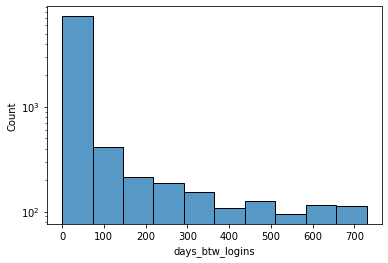

In [26]:
sns.histplot(data=users['days_btw_logins'], bins=10, log_scale=[False, True])

We can see the plot of days between last login and creation day is highly skewed even after applying the log-scale to the count. Many people don't login much or even never login after the creation day. That matches the adopted situation as well. 

In [27]:
((users['adopted']==0)&(users['days_btw_logins']<5)).sum()/(users['adopted']==0).sum()

0.5863302397525135

As shown above, if one user do not login 5 days after they create the account, they have more then 58% percent chance to be not adopted.

<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

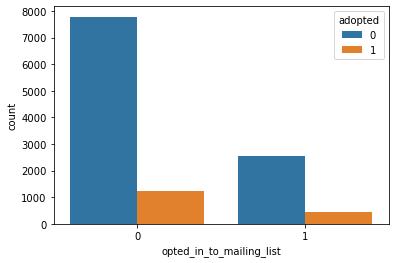

In [28]:
sns.countplot(x='opted_in_to_mailing_list', data=users, hue='adopted')

In [29]:
mail_adopt = ((users['adopted']==1)&(users['opted_in_to_mailing_list']==1)).sum()/(users['opted_in_to_mailing_list']==1).sum()
print('There are ', '{:.4}'.format(mail_adopt*100), 'percent users who opted in to mailing list are adopted.')
mail_adopt = ((users['adopted']==1)&(users['opted_in_to_mailing_list']==0)).sum()/(users['opted_in_to_mailing_list']==0).sum()
print('There are ', '{:.4}'.format(mail_adopt*100), 'percent users who opted out to mailing list are adopted.')

There are  14.33 percent users who opted in to mailing list are adopted.
There are  13.62 percent users who opted out to mailing list are adopted.


So the adoption rates based on mailing list condition do not vary that much. The mailing list may not help keep users.

<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

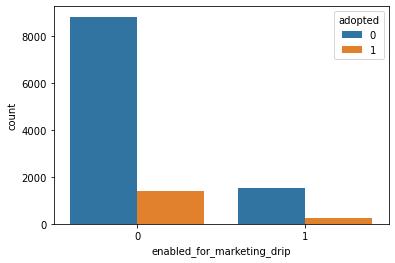

In [30]:
sns.countplot(x='enabled_for_marketing_drip', data=users, hue='adopted')

In [31]:
mail_adopt = ((users['adopted']==1)&(users['enabled_for_marketing_drip']==1)).sum()/(users['enabled_for_marketing_drip']==1).sum()
print('There are ', '{:.4}'.format(mail_adopt*100), 'percent users who are on the regular marketing email drip are adopted.')
mail_adopt = ((users['adopted']==1)&(users['enabled_for_marketing_drip']==0)).sum()/(users['enabled_for_marketing_drip']==0).sum()
print('There are ', '{:.4}'.format(mail_adopt*100), 'percent users who are not on the regular marketing email drip are adopted.')

There are  14.34 percent users who are on the regular marketing email drip are adopted.
There are  13.7 percent users who are not on the regular marketing email drip are adopted.


Whether the users are on the regular marketing email drip doesn't seem to affect the adoption rate either.

In [32]:
users['org_id'].value_counts()[:10]

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [33]:
users['org_id'].value_counts()[-10:]

378    10
304    10
395     9
315     9
355     9
396     9
400     8
397     8
386     7
416     2
Name: org_id, dtype: int64

Based on the number of useres in the organization, we can see that organizations that have smaller ID number tends to get more users. This might because the numbering system is based on the creation time of the organization. When the organization stays long enough in the platform, it built up more users.

In [34]:
users['if_invited'] = users['invited_by_user_id'].apply(lambda x : 0 if np.isnan(x) else 1)

<AxesSubplot:xlabel='if_invited', ylabel='count'>

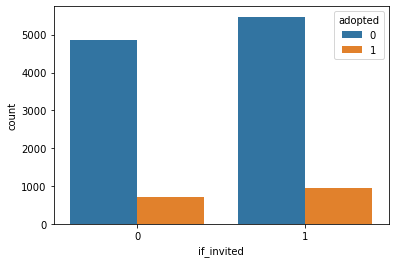

In [35]:
sns.countplot(x='if_invited', data=users, hue='adopted')

In [36]:
mail_adopt = ((users['adopted']==1)&(users['if_invited']==1)).sum()/(users['if_invited']==1).sum()
print('There are ', '{:.4}'.format(mail_adopt*100), 'percent users who are invited to the platform are adopted.')
mail_adopt = ((users['adopted']==1)&(users['if_invited']==0)).sum()/(users['if_invited']==0).sum()
print('There are ', '{:.4}'.format(mail_adopt*100), 'percent users who join without an invitation are adopted.')

There are  14.7 percent users who are invited to the platform are adopted.
There are  12.77 percent users who join without an invitation are adopted.


The adoption rate for people who were invited to the platform is slightly higher then people who join on their own. Since the difference is small, we cannot conclude the tendency.

## Prediction Model

For the prediction model, few columns could be removed because they don't contribute to the model. Some columns can be represented better by the new column created during the EDA process.

In [37]:
users_for_modeling = users.drop_duplicates().drop(['name','creation_time','last_session_creation_time','invited_by_user_id','email','org_id','object_id'], axis=1)

In [38]:
users_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   adopted                     12000 non-null  int64  
 4   days_btw_logins             8823 non-null   float64
 5   if_invited                  12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 656.2+ KB


In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted                     12000 non-null  int64         
 11  days_btw_logins             8823 non-null   float64   

The 'days_btw_logins' column is the only column that has null value in the dataset for modeling. It is because the original dataset has null values in the 'last_session_creation_time' column. There are two ways to handle it. We can assume null values means that user never login after creating the account. On the other hand we can drop these columns because it might just be a system error. For now, I will use the first method to maximize the dataset for modeling purpose.

In [40]:
users_for_modeling['days_btw_logins'].fillna(0, inplace=True)

In [41]:
users_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   adopted                     12000 non-null  int64  
 4   days_btw_logins             12000 non-null  float64
 5   if_invited                  12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 656.2+ KB


There are no duplicates in the dataset. Now the data are ready for modeling.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [43]:
users_for_modeling = pd.get_dummies(users_for_modeling)

In [44]:
users_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   adopted                             12000 non-null  int64  
 3   days_btw_logins                     12000 non-null  float64
 4   if_invited                          12000 non-null  int64  
 5   creation_source_GUEST_INVITE        12000 non-null  uint8  
 6   creation_source_ORG_INVITE          12000 non-null  uint8  
 7   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 8   creation_source_SIGNUP              12000 non-null  uint8  
 9   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 621.1 KB


In [45]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(users_for_modeling.drop(['adopted'], axis=1), users_for_modeling['adopted'] , 
                                                            test_size=0.3, random_state=42)
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))

0.9758333333333333


/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# The estimated coefficients will all be around 1:
print(clf.coef_[0])

[ 0.43778767  0.03134152  0.06498288 -0.00796474  0.06969925 -0.07766399
 -0.33843929 -0.07742037  0.0900315 ]


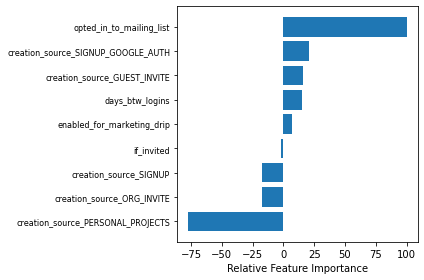

In [47]:
feature_importance = (clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [48]:
# Normalizing the feeding data see if it helps

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
Xlr = scaler.transform(X_train)
Xtestlr = scaler.transform(X_test)

clf_scale = LogisticRegression()
clf_scale.fit(Xlr, y_train)
print(accuracy_score(clf_scale.predict(Xtestlr), y_test))

0.9658333333333333


Normalizing actually made the model worst. There is no continuous data in the dataset, so normalizing is not necessary. 

(array([0.        , 0.01976411, 1.        ]), array([0.        , 0.94600432, 1.        ]), array([2, 1, 0]))
0.9631201069104144


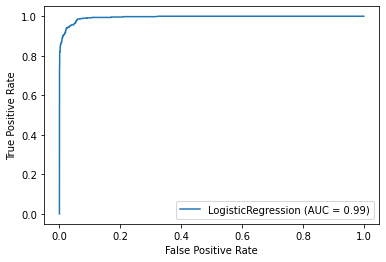

In [49]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

print(roc_curve(clf.predict(X_test), y_test))
print(roc_auc_score(clf.predict(X_test), y_test))
plot_roc_curve(clf, X_test, y_test)

In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3075,   25],
       [  62,  438]])

In [51]:
print(precision_score(y_test, y_pred))

0.9460043196544277


In [52]:
print(recall_score(y_test, y_pred))

0.876


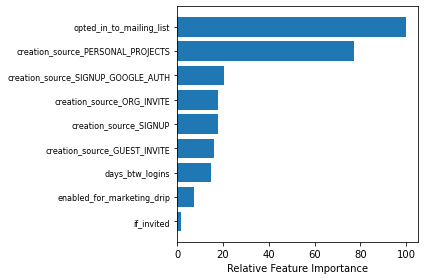

In [53]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

From the diagram above, we can see that the creation source affect the most on the adoption. The invitation status and marketing drip condition also affect the adoption. 

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

# Create first pipeline

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10))}
]

# Create grid search object

clf_rf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_rf_clf = clf_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.8s finished


In [55]:
print(accuracy_score(best_rf_clf.predict(X_test), y_test))

0.9652777777777778


(array([0.        , 0.02308432, 1.        ]), array([0.        , 0.88981289, 1.        ]), array([2, 1, 0]))
0.9333642839574229


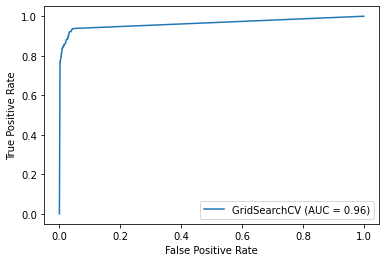

In [56]:
print(roc_curve(best_rf_clf.predict(X_test), y_test))
print(roc_auc_score(best_rf_clf.predict(X_test), y_test))
plot_roc_curve(best_rf_clf, X_test, y_test)

In [57]:
y_pred = best_rf_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3047,   53],
       [  72,  428]])

In [58]:
print(precision_score(y_test, y_pred))

0.8898128898128899


In [59]:
print(recall_score(y_test, y_pred))

0.856


Although the accuracy and precision got lower in the random forest classifier model, the recall is higher. It means the random forest model is better for finding all the positive sample, which is the adopted users in our case. The difference is vary tiny. I would say both models are good models.

In [60]:
clf_rf.best_estimator_.named_steps['classifier'].feature_importances_

array([3.52739328e-03, 4.19537156e-03, 9.84304844e-01, 5.49954607e-04,
       1.42351445e-03, 9.35467667e-04, 2.37253178e-03, 1.27676707e-03,
       1.41415568e-03])

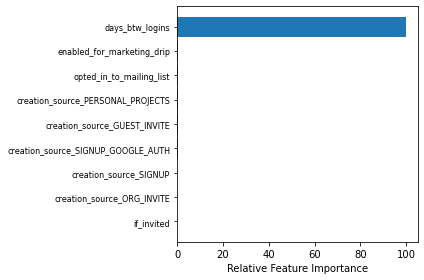

In [61]:
feature_importance = abs(clf_rf.best_estimator_.named_steps['classifier'].feature_importances_)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

The random forest model actually rate the features very differently. The days between creation day and last login becomes the most important feature for the model.

In [62]:
users_for_modeling_v2 = users.drop_duplicates().drop(['name','creation_time','last_session_creation_time','invited_by_user_id','email','org_id','object_id'], axis=1).dropna()

In [63]:
users_for_modeling_v2 = pd.get_dummies(users_for_modeling_v2)

In [64]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(users_for_modeling_v2.drop(['adopted'], axis=1), users_for_modeling_v2['adopted'] , 
                                                            test_size=0.3, random_state=42)

clf_v2 = LogisticRegression()
# Fit the model on the trainng data.
clf_v2.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf_v2.predict(X_test), y_test))

0.9625991688704193


/Users/lanxy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0.        , 0.03215434, 1.        ]), array([0.        , 0.93829787, 1.        ]), array([2, 1, 0]))
0.9530717657522063


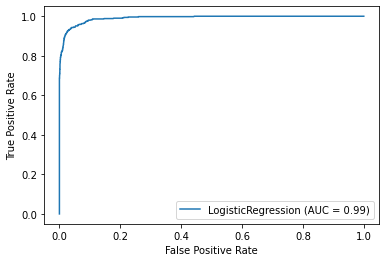

In [65]:
print(roc_curve(clf_v2.predict(X_test), y_test))
print(roc_auc_score(clf_v2.predict(X_test), y_test))
plot_roc_curve(clf_v2, X_test, y_test)

In [66]:
y_pred = clf_v2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2107,   29],
       [  70,  441]])

In [67]:
print(precision_score(y_test, y_pred))

0.9382978723404255


In [68]:
print(recall_score(y_test, y_pred))

0.863013698630137


In [71]:
clf_v2.coef_[0]

array([ 0.4229755 , -0.18359454,  0.06238546,  0.00422806, -0.10802351,
        0.11225158,  0.01718453, -0.18108131,  0.14957639])

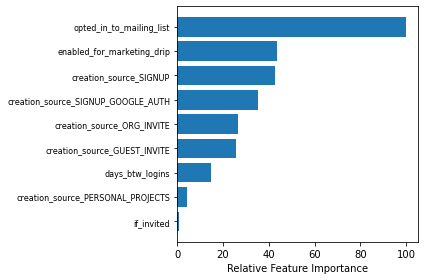

In [72]:
feature_importance = abs(clf_v2.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [73]:
# Create grid search object

clf_rf_v2 = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_rf_clf_v2 = clf_rf_v2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


In [74]:
print(accuracy_score(best_rf_clf_v2.predict(X_test), y_test))

0.9516433698526634


(array([0.        , 0.03561517, 1.        ]), array([0.        , 0.89484536, 1.        ]), array([2, 1, 0]))
0.9296150948434534


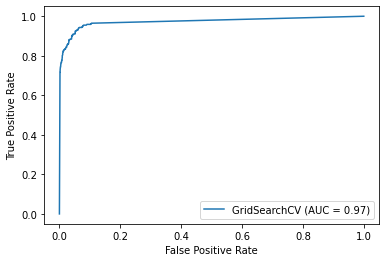

In [75]:
print(roc_curve(best_rf_clf_v2.predict(X_test), y_test))
print(roc_auc_score(best_rf_clf_v2.predict(X_test), y_test))
plot_roc_curve(best_rf_clf_v2, X_test, y_test)

In [76]:
y_pred = best_rf_clf_v2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2085,   51],
       [  77,  434]])

In [77]:
print(precision_score(y_test, y_pred))

0.8948453608247423


In [78]:
print(recall_score(y_test, y_pred))

0.8493150684931506


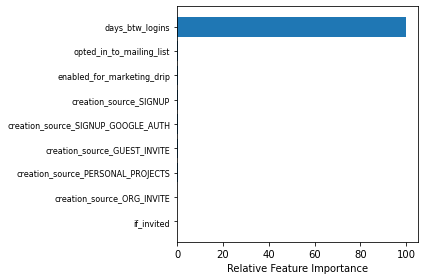

In [79]:
feature_importance = abs(clf_rf_v2.best_estimator_.named_steps['classifier'].feature_importances_)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In conclusion, both logistic classifier and random forest classifier work great on the dataset. They both have recall higher than 0.85 no matter how I imputed the missing data in days between logins. The company can focus on the period between last login and creation time to monitor if users are active. The random forest classifier model can give a pretty decent prediction based on that. If the days between logins are not reachable (such as many missing data), company can use the logistic classifier model instead with account creation method, mailing list and market drip information and so on. 
<br> There are rooms to improve the model, we only tried two modeling method. There might be other models that give us a higher recall score with similar accuracy and precision. 